In [1]:
import os 
os.chdir("../")

In [24]:
from sde.sde_class import sde_class
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt

In [25]:
sde = sde_class(T=1, N=10000, M=1000)

In [26]:
def mu_fun(x):
    return 2 * x
def sigma_fun(x):
    return x

In [27]:
X_dict = {}
for R in [1,2,128,256]:
    X = sde.euler_maruyama(mu_fun=mu_fun,
                            sigma_fun=sigma_fun,
                            x0=1,
                            R=R)
    X_dict[R] = X

100%|██████████| 39/39 [00:00<00:00, 8693.55it/s]


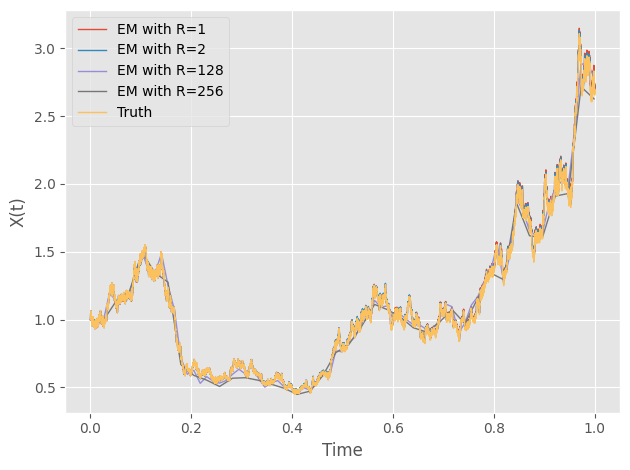

In [28]:
plt.style.use('ggplot')
for R in X_dict:
    plt.plot(sde.time[::R], X_dict[R][0,:], 
             label='EM with R='+str(R),
             linewidth=1)
plt.plot(sde.time, np.exp((2-0.5)*sde.time + sde.W[0,:]), 
        label="Truth",
        linewidth=1)
plt.legend()
plt.xlabel("Time")
plt.ylabel("X(t)")
plt.tight_layout()

In [29]:
error_df = pd.DataFrame(np.zeros((1000, 4)),
                        columns=['EM with R='+str(R) for R in X_dict])
for R in X_dict:
    for path in range(1000):
        error_df.at[path, 'EM with R='+str(R)] = \
            X_dict[R][path,-1] - np.exp((2-0.5)*1 + sde.W[path,-1])

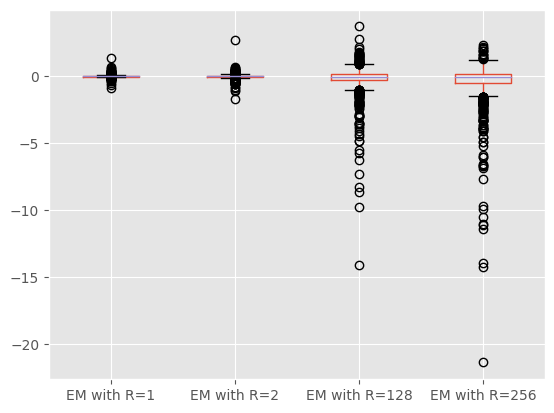

In [31]:
error_df.boxplot()
plt.show()

In [12]:
def d_sigma_fun(x):
    return 1
X_dict = {}
for R in [1,2,128,256]:
    X = sde.milstein(mu_fun=mu_fun,
                    sigma_fun=sigma_fun,
                    d_sigma_fun=d_sigma_fun,
                    x0=1,
                    R=R)
    X_dict[R] = X

100%|██████████| 39/39 [00:00<00:00, 6747.43it/s]


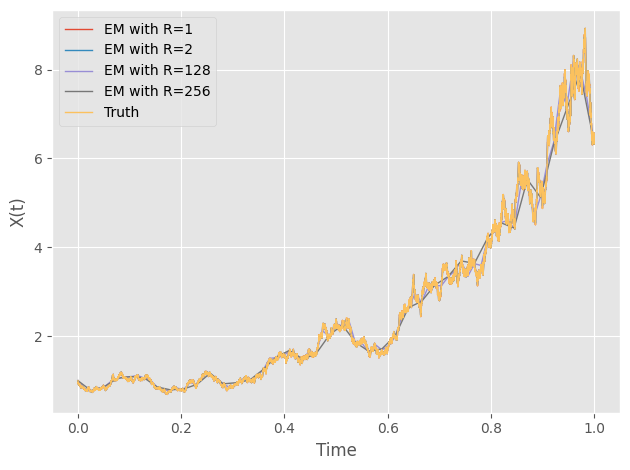

In [13]:
plt.style.use('ggplot')
for R in X_dict:
    plt.plot(sde.time[::R], X_dict[R][0,:], 
             label='EM with R='+str(R),
             linewidth=1)
plt.plot(sde.time, np.exp((2-0.5)*sde.time + sde.W[0,:]), 
        label="Truth",
        linewidth=1)
plt.legend()
plt.xlabel("Time")
plt.ylabel("X(t)")
plt.tight_layout()

In [14]:
error_df = pd.DataFrame(np.zeros((1000, 4)),
                        columns=['EM with R='+str(R) for R in X_dict])
for R in X_dict:
    for path in range(1000):
        error_df.at[path, 'EM with R='+str(R)] = \
            X_dict[R][path,-1] - np.exp((2-0.5)*1 + sde.W[path,-1])

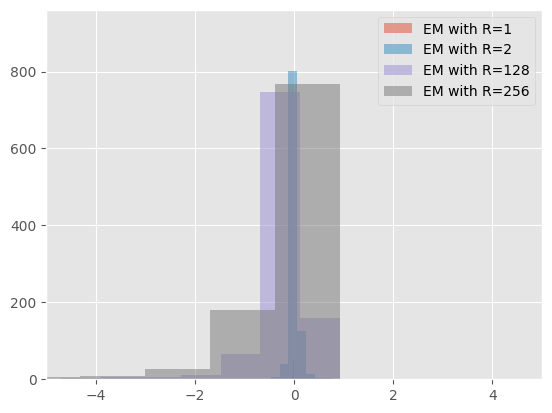

In [17]:
error_df.boxplot()
plt.show()